<a href="https://colab.research.google.com/github/edwardauron/DS-Unit-2-Sprint-4-Model-Validation/blob/master/Weekly_Workbook_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install seaborn==0.9.0

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/edwardauron/DS-Unit-2-Sprint-4-Model-Validation/master/Admission_data.csv')

In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


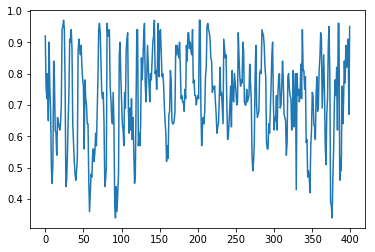

In [53]:
df['Chance of Admit '].plot()

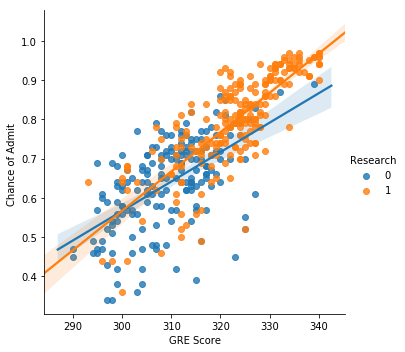

In [54]:
sns.lmplot(x = 'GRE Score', y = 'Chance of Admit ', data=df, hue='Research')

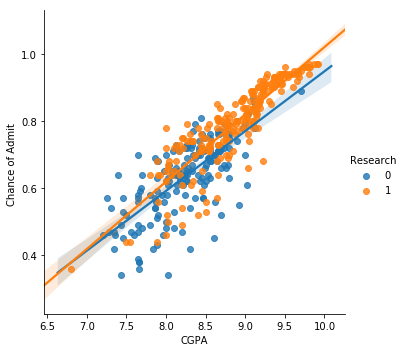

In [55]:
sns.lmplot(x = 'CGPA', y = 'Chance of Admit ', data=df, hue='Research')

# Rather intuitive, but we expect our model to show an indication of research contributing to admittance rate positvely, and more so than non-research published students.

In [0]:
df = df.drop(['Serial No.'], axis=1)

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


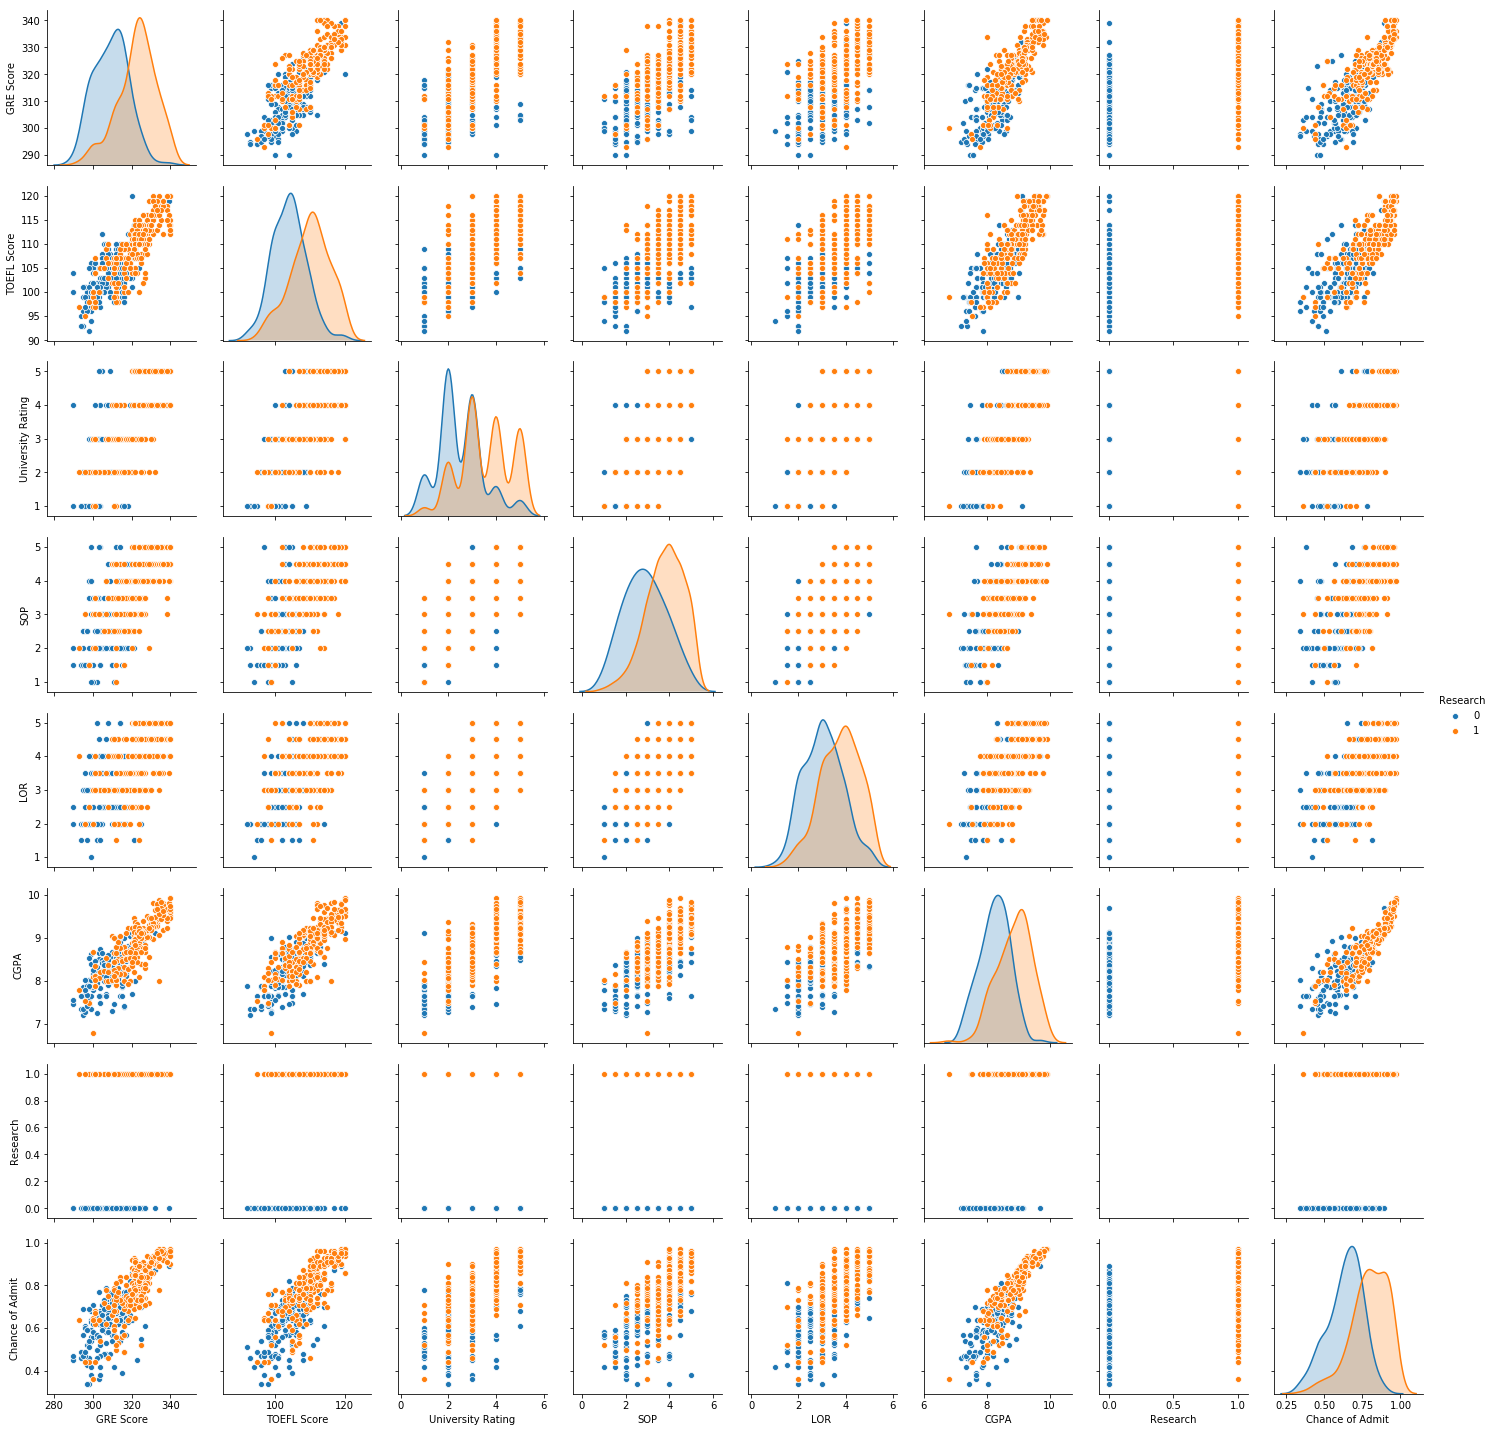

In [57]:
sns.pairplot(df, hue='Research')

# This is incredibly linear data :P.. Like the prettiest thing i've ever seen.

In [58]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
corr = df.corr()

In [60]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

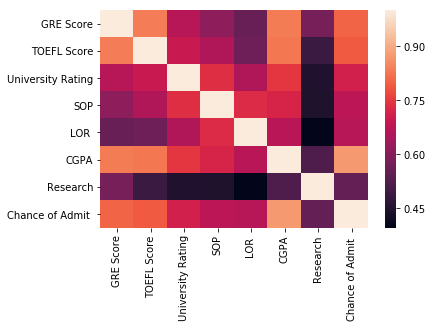

In [61]:
sns.heatmap(corr)

# Okay, let's fit what I believe will be a hyper accurate model and validate it :P 

In [0]:
y = df['Chance of Admit '] # that extra space..... .... .... -_-

In [0]:
X = df.drop(['Chance of Admit '], axis=1)

In [0]:
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('lr',LinearRegression())
])

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [0]:
model = pipeline.fit(X_train,y_train)

In [0]:
y_preds = model.predict(X_test)

In [97]:
y_preds

array([0.64916133, 0.72319246, 0.93534894, 0.82161719, 0.58010543,
       0.92955335, 0.52394479, 0.53929604, 0.65966993, 0.84041175,
       0.72162358, 0.90930156, 0.55264646, 0.88798786, 0.69818853,
       0.68758551, 0.66698292, 0.47966361, 0.69109839, 0.97571167,
       0.58657737, 0.65268473, 0.71038978, 0.53186705, 0.94999142,
       0.81035189, 0.69371319, 0.56258221, 0.68188877, 0.81250393,
       0.8094908 , 0.94735252, 0.64584322, 0.51077365, 0.6613749 ,
       0.66643326, 0.7201965 , 0.64437189, 0.61530134, 0.88096998,
       0.7424471 , 0.59837856, 0.77667814, 0.96120512, 0.84893303,
       0.83567587, 0.94889935, 0.6483672 , 0.92235292, 0.8591684 ,
       0.89511656, 0.73010103, 0.78591454, 0.95214742, 0.5747998 ,
       0.59049161, 0.68795469, 0.84501809, 0.60309281, 0.84659426,
       0.6611105 , 0.65563603, 0.69848047, 0.50959855, 0.63049972,
       0.71931506, 0.62133271, 0.84328362, 0.85774204, 0.79722496,
       0.72270856, 0.8193762 , 0.87298172, 0.83133146, 0.52193

In [101]:
print('Score:', model.score(X_test, y_test))

Score: 0.8161147779165654


In [0]:
scores = cross_val_score(pipeline, X_train, y_train, cv=10)

In [107]:
scores

array([0.75086408, 0.63912661, 0.69406601, 0.85293129, 0.76205991,
       0.68858914, 0.73425864, 0.80523047, 0.87204818, 0.87850821])